# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Arnav Tayal
- Chaewon Heo
- Martha Chow
- Zhiyi Zhu

<a id='research_question'></a>
# Research Question

Main question: Are characteristics of an individual’s diet (such as the amount of calories, macronutrients, and/or micronutrients) correlated with their likelihood of contracting COVID-19? 

Sub-questions: Can we correlate diet type (eg. vegetarian, keto, pescetarian) with an individual’s likelihood of contracting COVID-19? Which characteristic is the strongest predictor? 

<a id='background'></a>

## Background & Prior Work

With the prevalence of the COVID-19 in recent years, multiple actions are taken to protect people from getting infected and help people recover. One possible action is to eat a healthy diet, since it is commonly heard that eating a healthy diet has multiple benefits, such as lowering risks for multiple common diseases, supporting muscle, and boosting immunity [^1]. According to the World Health Organization, a healthy diet is balanced calorically with energy expenditure; low in saturated fats, trans fats, free sugar, salt; and high in vegetables, fruits, whole grains, and legumes). [^2]

Multiple studies have shown that there are correlations between certain dietary components and general health. For example, dietary fatty acids are found to have a significant role in immune responses and thus support immunity [^3]; Consuming a good source of protein at least twice a day can help maintaining strong respiratory muscles [^4], and high levels of certain vegetables are essential for sustaining intestinal immune function [^5]. However, these findings do not directly address whether there’s a correlation between certain dietary components and COVID-19.

There are existing efforts to study healthy eating as a non-pharmaceutical intervention for COVID-19 [^6]. A dataset that details the typical characteristics of a country’s diet, as well as its obesity and COVID-19 rates, has been compiled. It is based on findings from organizations such as the UN and Johns Hopkins university. Potential concerns with the data include accuracy, inconsistencies in units, and collection from different years (which could make comparisons unfair). Notable conclusions from analysis so far include that "COVID-19 confirmed percentage is less in the countries where Animal Product Protein consumption is low like India", "countries where obesity is low COVID-19 cases are low", and "​​ The countries with the most recovered rate seem to consume more vegetables than people on average".

It is worth noting that existing analysis on the dataset is incomplete, scattered, and presented in a confusing way (eg. relevant information like vegetable consumptions vs recovery rate is mixed in with irrelevant information like vegetable consumption vs alcohol consumption). There also  seems to be a stronger emphasis on establishing the relationship between obesity and COVID-19 rates rather than diet and COVID-19 rates.
[^1]: "Benefits of Healthy Eating | Nutrition | DNPAO." *CDC*, 16 May 2021, https://www.cdc.gov/nutrition/resources-publications/benefits-of-healthy-eating.html. Accessed 22 April 2022. 
[^2]: "Healthy diet." *WHO | World Health Organization*, 29 April 2020, https://www.who.int/news-room/fact-sheets/detail/healthy-diet. Accessed 22 April 2022. 
[^3]: Radzikowska, Urszula. "The Influence of Dietary Fatty Acids on Immune Responses." *MDPI*, 2019, https://doi.org/10.3390/nu11122990. Accessed 22 April 2022.
[^4]: "Nutrition and COPD." *American Lung Association*, https://www.lung.org/lung-health-diseases/lung-disease-lookup/copd/living-with-copd/nutrition. Accessed 22 April 2022.
[^5]: Hooper, Lora V. "You AhR what you eat: linking diet and immunity." *Cell* vol. 147,3 (2011): 489-91. doi:10.1016/j.cell.2011.10.004 
[^6]: Ren, Maria. "COVID-19 Healthy Diet Dataset." *Kaggle*, https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset. Accessed 22 April 2022. 

# Hypothesis


The characteristics of an individual’s diet is correlated with the likelihood of COVID-19 infection. Diets types that are correlated with decreased incidence of COVID-19 infection have common characteristics. 
Justification: based on past research, those who consume a healthy diet tend to be less likely to contract disease. As such, we predict that COVID-19 will fit this trend. 

Of all characteristics, amount of calories (units TBC, likely to be per year) is the most accurate predictor of likelihood to contract COVID-19.  
Justification: Although calories do not necessarily represent the quality of one’s diet, it is generally the case that a diet high in calories is a poor diet. We can’t say this with as much confidence for other characteristics that are more ‘specific’ (calories can come from a range of nutrients, fat content is only based on one type of nutrient).

# Dataset(s)


- Dataset Name: Supply_Quantity_Kg
- Link to the dataset:https://github.com/mariarencode/COVID_19_Dataset_Challenge/tree/master/Food_Supply_Quantity_Kg
- Number of observations: 174

Each file in this dataset records the amount of a particular food category of each country in kilograms/capita/yr

- Dataset Name: Fat Supply
- Link to the dataset: https://github.com/mariarencode/COVID_19_Dataset_Challenge/tree/master/Fat_Supply
- Number of observations: 174

Each file in this dataset records the amount of fat in a particular food category of each country in grams/capita/yr

- Dataset Name: Protein Supply
- Link to the dataset: https://github.com/mariarencode/COVID_19_Dataset_Challenge/tree/master/Protein_Supply
- Number of observations: 174

Each file in this dataset records the amount of protein in a particular food category of each country in grams/capita/yr

We plan to pick particular columns from these datasets and combine them using the merge function in pandas, each row will be unique to a country 

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# packages for importing files
import os
import glob

__Get the add the Confirmed,Deaths,Recovered,Active,Population to the dataframe; those are directly extracted from the dataframe that records the precentages. Due to the time dependence of active COVID cases, it will be excluded from analysis. Beside the population, the unit for the other 3 quantitative columns are in percentages.__

In [2]:
df_covid = pd.read_csv('Food_Supply_Quantity_kg_Data.csv',usecols=['Country','Confirmed','Deaths','Recovered','Population'])
df_covid.head(6)

,Country,Confirmed,Deaths,Recovered,Population
0,Afghanistan,0.142134,0.006186,0.123374,38928000.0
1,Albania,2.967301,0.050951,1.792636,2838000.0
2,Algeria,0.244897,0.006558,0.167572,44357000.0
3,Angola,0.061687,0.001461,0.056808,32522000.0
4,Antigua and Barbuda,0.293878,0.007143,0.190816,98000.0
5,Argentina,4.356147,0.108227,3.905192,45377000.0


# Data Cleaning

__Process data for food quantity (unit: kg/capita/yr)__

In [3]:
# read in most csvs as a list
path = 'Food_Supply_Quantity_Kg'
all_files = glob.glob(os.path.join(path, "*.csv"))

In [4]:
# function that standardize food name; all lowercase + no space + no special character
def getName(n):
    name = n.replace(' ','_')
    name = name.replace('-','')
    name = name.replace(',','')
    name = name.replace('&','')
    name = name.replace('__','_')
    return name.lower()

In [5]:
# read in the first csv in the directory so we can merge other csvs with it
col_list = ["Area", "Item", "Value"] # we only need the country and the quantity of food from the file
df_quantity = pd.read_csv(all_files[0], usecols=col_list)
name = getName(df_quantity.loc[0].at["Item"])
df_quantity = df_quantity.drop('Item', 1)
df_quantity.columns = ['country',name]

# merge all csvs in the directory into df_quantity
for i in all_files[1:len(all_files)]:
    # extract the name of the file
    tmp = pd.read_csv(i, usecols=col_list)
    name = getName(tmp.loc[0].at["Item"])
    tmp = tmp.drop('Item', 1)
    tmp.columns = ['country',name] 
    df_quantity = pd.merge(df_quantity,tmp,on ='country', how='outer')

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\1764355593.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_quantity = df_quantity.drop('Item', 1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\1764355593.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\1764355593.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\1764355593.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
C:\Users\

In [6]:
# we also need the Animal Product and Vegetal Product csvs that are in different forms, so add them to dataframe seperately
animal = pd.read_csv('FAOSTAT_food_kg_animal.csv')
animal.columns = ['country','animal_products'] 
vegetal_prod = pd.read_csv('FAOSTAT_food_kg_vegetal_prod.csv')
vegetal_prod.columns = ['country','vegetal_products']
df_quantity = pd.merge(df_quantity,animal,on ='country', how='outer')
df_quantity = pd.merge(df_quantity,vegetal_prod,on ='country', how='outer')

In [7]:
# sort the columns, with country at the first column, and the food columns in alphabetical order
df_quantity = df_quantity.sort_index(axis=1)
first_column = df_quantity.pop('country')
df_quantity.insert(0, 'country', first_column)

# fill na with 0
df_quantity = df_quantity.fillna(0)

In [8]:
df_quantity.head(6)

,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,meat,...,pulses,spices,starchy_roots,stimulants,sugar_crops,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products
0,Afghanistan,0.01,1.41,67.42,0.0,177.30,1.50,0.25,38.23,8.59,...,2.11,0.41,6.29,2.20,0.0,9.64,0.55,3.82,48.34,289.89
1,Albania,42.15,3.42,473.16,0.0,145.76,14.66,5.36,171.08,47.51,...,6.00,0.02,45.62,2.66,0.0,38.74,3.82,8.22,296.86,787.33
2,Algeria,4.33,0.45,153.89,0.0,218.56,8.43,3.86,101.92,18.06,...,7.64,0.89,66.04,3.54,0.0,29.30,1.84,16.47,186.08,644.82
3,Angola,66.33,0.64,56.27,0.0,104.01,0.67,20.22,68.52,23.49,...,7.43,0.01,206.80,0.58,0.0,21.12,0.07,7.38,26.31,514.68
4,Antigua and Barbuda,45.29,0.11,210.99,0.0,75.93,2.88,52.54,136.07,72.04,...,2.33,1.93,18.39,1.98,0.0,49.07,0.32,10.26,69.01,421.99
5,Argentina,66.28,3.47,300.48,0.0,130.63,15.50,7.29,93.87,109.38,...,0.82,0.19,47.25,6.80,0.0,47.43,0.31,14.82,67.57,476.16


In [9]:
df_quantity.shape

(173, 24)

__Process data for fat ( original unit: g/capita/day; will be converted to kg/capita/year)__

In [10]:
# function that converts g/capita/day to kg/capita/yr 
# TODO: someone check if this is correct
def standUnit(x):
    # g -> kg: / 1000
    # day -> year: * 365
    return x / 1000 * 365

In [11]:
# read in most csvs as a list
path = 'Fat_Supply'
all_files = glob.glob(os.path.join(path, "*.csv"))

# read in the first csv in the directory so we can merge other csvs with it
col_list = ["Area", "Item", "Value"] # we only need the country and the quantity of food from the file
df_fat = pd.read_csv(all_files[0], usecols=col_list)
name = getName(df_fat.loc[0].at["Item"])
df_fat = df_fat.drop('Item', 1)
df_fat.columns = ['country',name]

# merge all csvs in the directory into df_fat
for i in all_files[1:len(all_files)]:
    # extract the name of the file
    tmp = pd.read_csv(i, usecols=col_list)
    name = getName(tmp.loc[0].at["Item"])
    tmp = tmp.drop('Item', 1)
    tmp.columns = ['country',name] 
    df_fat = pd.merge(df_fat,tmp,on ='country', how='outer')
    
# sort the columns, with country at the first column, and the food columns in alphabetical order
df_fat = df_fat.sort_index(axis=1)
first_column = df_fat.pop('country')
df_fat.insert(0, 'country', first_column)

# replace na with 0
df_fat = df_fat.fillna(0)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\3306572841.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_fat = df_fat.drop('Item', 1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\3306572841.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\3306572841.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\3306572841.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
C:\Users\Public\Doc

In [12]:
# convert g/capita/day to kg/capita/yr
df_fat[df_fat.columns[1:len(df_fat.columns)]] = df_fat[df_fat.columns[1:len(df_fat.columns)]].applymap(standUnit)
df_fat

,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,meat,...,pulses,spices,starchy_roots,stimulants,sugar_crops,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products
0,Afghanistan,0.00000,1.39065,4.83625,0.0,1.79580,0.15330,0.0073,0.09490,1.36875,...,0.04380,0.06205,0.01095,0.02190,0.0000,0.0,0.16790,3.81790,0.08030,6.34005
1,Albania,0.00000,2.93460,27.48085,0.0,2.29585,1.41255,0.1241,0.55115,7.50805,...,0.09855,0.00000,0.04380,0.45260,0.0000,0.0,0.78840,7.93875,0.55845,15.45775
2,Algeria,0.00000,0.52195,8.38770,0.0,2.44550,0.70810,0.1168,0.33580,2.26665,...,0.15695,0.09125,0.06570,0.16790,0.0000,0.0,0.50005,15.91765,0.29930,20.70280
3,Angola,0.00000,0.46720,5.44580,0.0,2.33235,0.05475,0.5037,0.12410,3.92375,...,0.11680,0.00365,0.25185,0.04015,0.0000,0.0,0.01095,7.99350,0.04380,12.34795
4,Antigua and Barbuda,0.00000,3.03680,18.02005,0.0,2.09145,0.25185,0.9928,0.79205,9.31480,...,0.04380,0.23360,0.02920,0.68620,0.0000,0.0,0.13140,9.39510,0.16060,14.50510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Venezuela (Bolivarian Republic of),0.00000,1.07310,7.72705,0.0,1.20450,0.31025,0.2701,0.45625,3.35800,...,0.05475,0.00000,0.06205,0.04015,0.0000,0.0,0.00730,13.97220,0.08760,15.94320
169,Viet Nam,0.00000,2.19000,19.04205,0.0,2.12795,0.44895,0.6424,0.23360,15.13655,...,0.04380,0.36135,0.04015,0.04745,0.0219,0.0,0.67160,3.21930,0.36500,9.59585
170,Yemen,0.00000,0.57305,3.56970,0.0,3.28135,0.15695,0.1095,0.07300,2.27760,...,0.14235,0.02920,0.01460,0.10585,0.0000,0.0,0.02190,6.72695,0.04745,10.66165
171,Zambia,0.02555,0.52560,3.13170,0.0,4.67200,0.20440,0.3285,0.04380,1.59870,...,0.02555,0.05110,0.06570,0.02190,0.0000,0.0,0.00365,4.98590,0.05110,13.17650


__Process protein as fat__

In [13]:
# read in most csvs as a list
path = 'Protein_Supply'
all_files = glob.glob(os.path.join(path, "*.csv"))

# read in the first csv in the directory so we can merge other csvs with it
col_list = ["Area", "Item", "Value"] # we only need the country and the quantity of food from the file
df_protein = pd.read_csv(all_files[0], usecols=col_list)
name = getName(df_protein.loc[0].at["Item"])
df_protein = df_protein.drop('Item', 1)
df_protein.columns = ['country',name]

# merge all csvs in the directory into df_protein
for i in all_files[1:len(all_files)]:
    # extract the name of the file
    tmp = pd.read_csv(i, usecols=col_list)
    name = getName(tmp.loc[0].at["Item"])
    tmp = tmp.drop('Item', 1)
    tmp.columns = ['country',name] 
    df_protein = pd.merge(df_protein,tmp,on ='country', how='outer')
    
# sort the columns, with country at the first column, and the food columns in alphabetical order
df_protein = df_protein.sort_index(axis=1)
first_column = df_protein.pop('country')
df_protein.insert(0, 'country', first_column)

# replace na with 0
df_protein = df_protein.fillna(0)
df_protein.head(3)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\3721737032.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_protein = df_protein.drop('Item', 1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\3721737032.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\3721737032.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\3721737032.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
C:\Users\Pu

,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,meat,...,pulses,spices,starchy_roots,stimulants,sugar_crops,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products
0,Afghanistan,0.00,0.03,10.55,0.0,38.92,0.44,0.07,0.63,3.39,...,1.35,0.18,0.21,0.60,0.0,0.00,0.15,0.00,1.23,43.54
1,Albania,0.44,0.17,66.34,0.0,34.03,4.32,1.50,3.05,18.31,...,3.48,0.00,2.12,0.63,0.0,0.01,0.64,0.02,7.76,53.21
2,Algeria,0.06,0.01,25.71,0.0,49.36,2.40,1.18,2.16,6.52,...,4.74,0.33,2.72,0.86,0.0,0.00,0.51,0.05,5.81,67.21


In [14]:
# convert g/capita/day to kg/capita/yr
df_protein[df_protein.columns[1:len(df_protein.columns)]] = df_protein[df_protein.columns[1:len(df_protein.columns)]].applymap(standUnit)
df_protein.head(3)

,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,meat,...,pulses,spices,starchy_roots,stimulants,sugar_crops,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products
0,Afghanistan,0.0000,0.01095,3.85075,0.0,14.20580,0.1606,0.02555,0.22995,1.23735,...,0.49275,0.06570,0.07665,0.21900,0.0,0.00000,0.05475,0.00000,0.44895,15.89210
1,Albania,0.1606,0.06205,24.21410,0.0,12.42095,1.5768,0.54750,1.11325,6.68315,...,1.27020,0.00000,0.77380,0.22995,0.0,0.00365,0.23360,0.00730,2.83240,19.42165
2,Algeria,0.0219,0.00365,9.38415,0.0,18.01640,0.8760,0.43070,0.78840,2.37980,...,1.73010,0.12045,0.99280,0.31390,0.0,0.00000,0.18615,0.01825,2.12065,24.53165


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [15]:
## YOUR CODE HERE
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy

## Creating Summary Dataframe ##

In [16]:
col_names = df_fat.columns

In [17]:
country_names = list(df_fat['country'])
covid_names = ['confirmed', 'deaths', 'recovered', 'active',
       'population']
macronutrient_source_names = ['alcoholic_beverages', 'animal_fats',
       'animal_products', 'aquatic_products_other', 'cereals_excluding_beer',
       'eggs', 'fish_seafood', 'fruits_excluding_wine', 'meat',
       'milk_excluding_butter', 'miscellaneous', 'offals', 'oilcrops',
       'pulses', 'spices', 'starchy_roots', 'stimulants', 'sugar_crops',
       'sugar_sweeteners', 'treenuts', 'vegetable_oils', 'vegetables',
       'vegetal_products']

In [18]:
# yearly fat intake of first three countries (alphabetical) (unit: kg/capita/yr)
fat_sum = df_fat[macronutrient_source_names].sum(axis=1)
fat_sum.head(3)

0    22.34895
1    85.87720
2    58.17735
dtype: float64

In [19]:
# yearly protein intake of first three countries (alphabetical) (unit: kg/capita/yr)
protein_sum = df_protein[macronutrient_source_names].sum(axis=1)
protein_sum.head(3)

0    39.48570
1    87.26785
2    67.82430
dtype: float64

In [20]:
#yearly carbohydrate intake of first three countries (alphabetical) (unit: kg/capita/yr)
#computed by total quantity-protein-fat
carb_sum=df_quantity.sum(axis=1)-protein_sum-fat_sum
carb_sum.head(3)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_28572\3701914948.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  carb_sum=df_quantity.sum(axis=1)-protein_sum-fat_sum


0     652.80535
1    2347.89495
2    1471.46835
dtype: float64

In [21]:
# create macronutrients summary dataframe
df_macro = pd.DataFrame({'country': country_names,
                          'fat_sum': fat_sum,
                          'protein_sum': protein_sum,
                          'carb_sum':carb_sum})

In [22]:
df_macro

,country,fat_sum,protein_sum,carb_sum
0,Afghanistan,22.34895,39.48570,652.80535
1,Albania,85.87720,87.26785,2347.89495
2,Algeria,58.17735,67.82430,1471.46835
3,Angola,35.58385,39.49300,1066.82315
4,Antigua and Barbuda,65.04665,59.45120,1141.85215
...,...,...,...,...
168,Venezuela (Bolivarian Republic of),47.32955,74.97465,945.83580
169,Viet Nam,57.27215,74.12055,1295.53730
170,Yemen,28.46635,65.95185,510.52180
171,Zambia,32.62005,76.37625,603.00370


In [23]:
fat_max, protein_max, carb_max = max(df_macro['fat_sum']), max(df_macro['protein_sum']),  max(df_macro['carb_sum'])
print('Maximum Fat Value: ' + str(fat_max), '\nMaximum Protein Value: ' + str(protein_max),'\nMaximum Carbohydrate Value: ' + str(carb_max),)

fat_min, protein_min, carb_min = min(df_macro['fat_sum']), min(df_macro['protein_sum']),  min(df_macro['carb_sum'])
print('Minimum Fat Value: ' + str(fat_min), '\nMinimum Protein Value: ' + str(protein_min),'\nMinimum Carbohydrate Value: ' + str(carb_min),)

Maximum Fat Value: 122.05964999999998 
Maximum Protein Value: 102.93365 
Maximum Carbohydrate Value: 2347.89495
Minimum Fat Value: 17.1477 
Minimum Protein Value: 29.127000000000002 
Minimum Carbohydrate Value: 510.5218


## Histogram of Worldwide Macronutrient Distribution ##
* `x` : percentage ranges
* `y` : count of countries that fall under the percentage range# fat intake distribution worldwide
fig1 = sns.histplot(x='fat_sum', data=df_macro, stat='count', bins=20)

Text(0.5, 1.0, 'Global distribution of Fat intake')

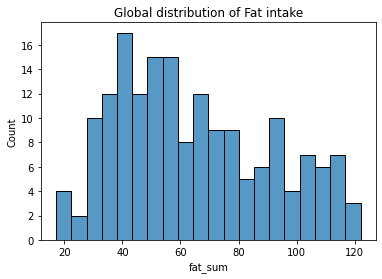

In [24]:
# fat intake distribution worldwide
fig1 = sns.histplot(x='fat_sum', data=df_macro, stat='count', bins=20)
fig1.set_title('Global distribution of Fat intake')

Text(0.5, 1.0, 'Global Distribution of Protein Intake')

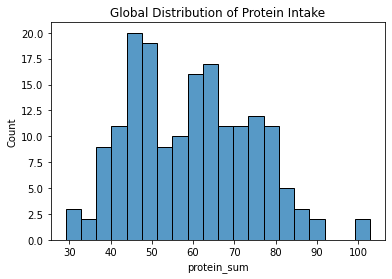

In [25]:
# protein intake distribution worldwide
fig2 = sns.histplot(x='protein_sum', data=df_macro, stat='count', bins=20)
fig2.set_title('Global Distribution of Protein Intake')

Text(0.5, 1.0, 'Global Distribution of Carbohydrate Intake')

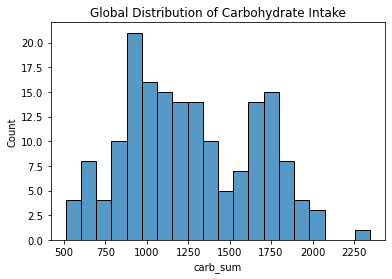

In [26]:
# carb intake distribution worldwide
fig3 = sns.histplot(x='carb_sum', data=df_macro, stat='count', bins=20)
fig3.set_title('Global Distribution of Carbohydrate Intake')

## Histogram of Worldwide Covid Distribution ##
* `x` : percentage of each case
* `y` : count of countries that fall under each bin

In [27]:
print('Total number of countries in the dataset: '+ str(len(df_covid['Country'])))

Total number of countries in the dataset: 170


Text(0.5, 1.0, 'Worldwide distribution of Confirmed Covid Cases')

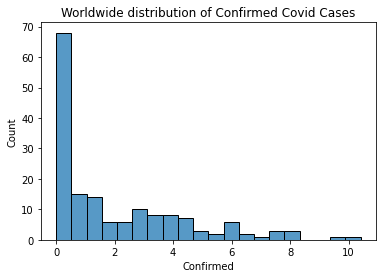

In [28]:
# covid confirmed cases distribution worldwide
# observed a strong right skew, performing a log transformation
fig4 = sns.histplot(x='Confirmed', data=df_covid, stat='count', bins=20)
fig4.set_title('Worldwide distribution of Confirmed Covid Cases') 

Text(0.5, 1.0, 'Global Distribution of Covid Deaths')

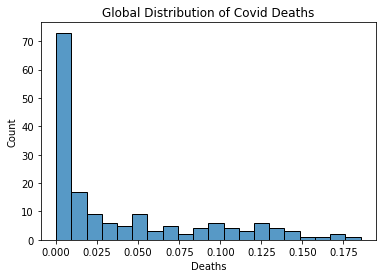

In [29]:
# covid deaths cases distribution worldwide
fig5 = sns.histplot(x='Deaths', data=df_covid, stat='count', bins=20)
fig5.set_title('Global Distribution of Covid Deaths') 

Text(0.5, 1.0, 'Global Distribution of Covid Recovery Rates')

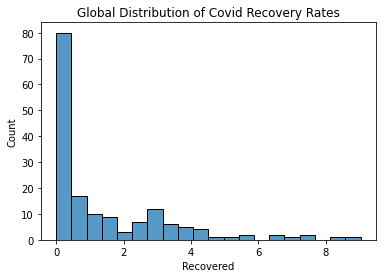

In [30]:
# covid recovered cases distribution worldwide
fig6 = sns.histplot(x='Recovered', data=df_covid, stat='count', bins=20)
fig6.set_title('Global Distribution of Covid Recovery Rates')

In [31]:
# perform log transformations of COVID Distributions
df_covid['Confirmed'] = np.log10(df_covid['Confirmed'])
df_covid['Deaths'] = np.log10(df_covid['Deaths'])
df_covid['Recovered'] = np.log10(df_covid['Recovered'])

C:\Users\arnav\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


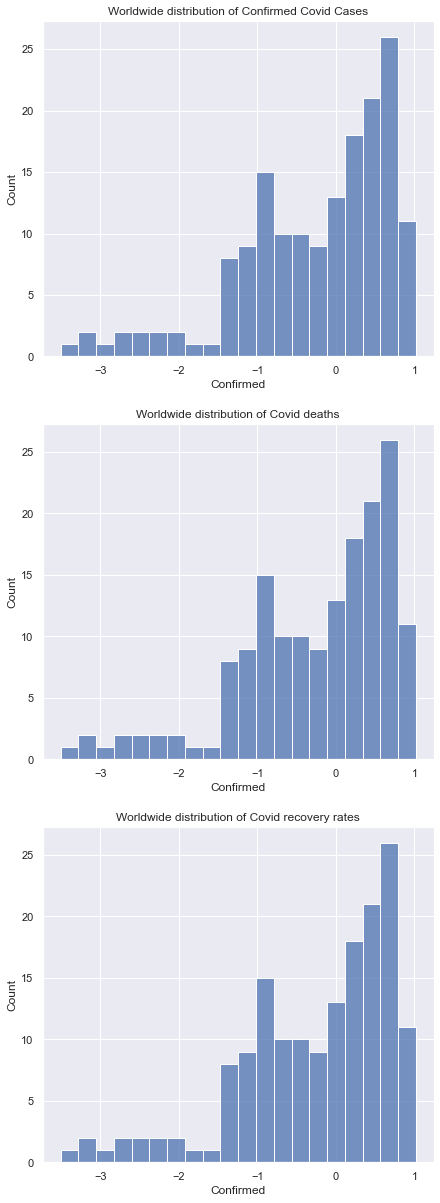

In [32]:
# replot figures with log transformation included
sns.set()
fig, axes = plt.subplots(3,1)
sns.histplot(x='Confirmed', data=df_covid, stat='count', bins=20, ax = axes[0])
axes[0].set_title('Worldwide distribution of Confirmed Covid Cases')
sns.histplot(x='Confirmed', data=df_covid, stat='count', bins=20, ax = axes[1])
axes[1].set_title('Worldwide distribution of Covid deaths')
sns.histplot(x='Confirmed', data=df_covid, stat='count', bins=20, ax = axes[2])
axes[2].set_title('Worldwide distribution of Covid recovery rates')

# set subplot size
fig.set_figheight(21)
fig.set_figwidth(7)

## Is there a correlation between macronutrient consumption and COVID rates in a country? ##

In [33]:
# combine macronutrient dataframe with COVID dataframe
macro_covid_combined_df = pd.concat([df_macro, df_covid], axis=1)
macro_covid_combined_df.head()

,country,fat_sum,protein_sum,carb_sum,Country,Confirmed,Deaths,Recovered,Population
0,Afghanistan,22.34895,39.48570,652.80535,Afghanistan,-0.847301,-2.208606,-0.908777,38928000.0
1,Albania,85.87720,87.26785,2347.89495,Albania,0.472362,-1.292844,0.253492,2838000.0
2,Algeria,58.17735,67.82430,1471.46835,Algeria,-0.611016,-2.183218,-0.775798,44357000.0
3,Angola,35.58385,39.49300,1066.82315,Angola,-1.209803,-2.835484,-1.245593,32522000.0
4,Antigua and Barbuda,65.04665,59.45120,1141.85215,Antigua and Barbuda,-0.531834,-2.146128,-0.719384,98000.0


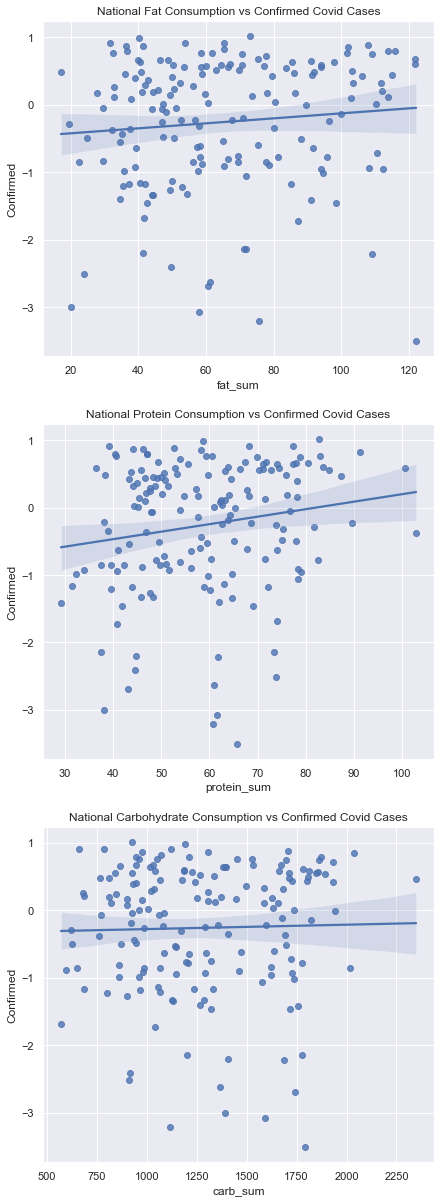

In [34]:
sns.set()
fig, axes = plt.subplots(3,1)
sns.regplot(data = macro_covid_combined_df, x = 'fat_sum', y = 'Confirmed', ax = axes[0])
axes[0].set_title('National Fat Consumption vs Confirmed Covid Cases')
sns.regplot(data = macro_covid_combined_df, x = 'protein_sum', y = 'Confirmed', ax = axes[1])
axes[1].set_title('National Protein Consumption vs Confirmed Covid Cases')
sns.regplot(data = macro_covid_combined_df, x = 'carb_sum', y = 'Confirmed', ax = axes[2])
axes[2].set_title('National Carbohydrate Consumption vs Confirmed Covid Cases')

# set subplot size
fig.set_figheight(21)
fig.set_figwidth(7)

In [35]:
# Linear regression on fat consumption and covid cases
outcome_fat, predictors_fat = patsy.dmatrices('Confirmed ~ fat_sum', macro_covid_combined_df)
mod_fat = sm.OLS(outcome_fat, predictors_fat)
res_fat = mod_fat.fit()
print(res_fat.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.629
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.204
Time:                        11:37:35   Log-Likelihood:                -226.88
No. Observations:                 164   AIC:                             457.8
Df Residuals:                     162   BIC:                             464.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4991      0.204     -2.451      0.0

In [36]:
# Linear regression on protein consumption and covid cases
outcome_protein, predictors_protein = patsy.dmatrices('Confirmed ~ protein_sum', macro_covid_combined_df)
mod_protein = sm.OLS(outcome_protein, predictors_protein)
res_protein = mod_protein.fit()
print(res_protein.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     4.761
Date:                Thu, 02 Jun 2022   Prob (F-statistic):             0.0305
Time:                        11:37:35   Log-Likelihood:                -225.32
No. Observations:                 164   AIC:                             454.6
Df Residuals:                     162   BIC:                             460.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.9121      0.309     -2.951      

In [37]:
# Linear regression on carbohydrate consumption and covid cases
outcome_carb, predictors_carb = patsy.dmatrices('Confirmed ~ carb_sum', macro_covid_combined_df)
mod_carb = sm.OLS(outcome_carb, predictors_carb)
res_carb = mod_carb.fit()
print(res_carb.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1031
Date:                Thu, 02 Jun 2022   Prob (F-statistic):              0.749
Time:                        11:37:35   Log-Likelihood:                -227.65
No. Observations:                 164   AIC:                             459.3
Df Residuals:                     162   BIC:                             465.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3414      0.271     -1.260      0.2

## Geospatial Analysis ##

In [40]:
pip install geopandas
import geopandas as gpd

SyntaxError: invalid syntax (2945984378.py, line 1)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot()

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*